# 4.3.3 Multiclass Perceptron, Digit Recognition

The multiclass perceptron should be regarded as direct extension of the binary Perceptron. The binary case can be extended as follows:

Algorithm:

```
w(k, n) = 0
iterate over epochs:
    iterate over observations (i):
        y_hat = argmax(x_i w.T)
        if y_hat != y_i
            w[y] = w[y] + x_i
            w[y_hat] = w[y_hat] - x_i
```
So, if prediction is wrong, we need to lower the score of wrong answer and raise score of right answer.

### Digit Recognizer
The data file train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


In [5]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
#Load dataset
data = pd.read_csv('train.csv')
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


42000 784


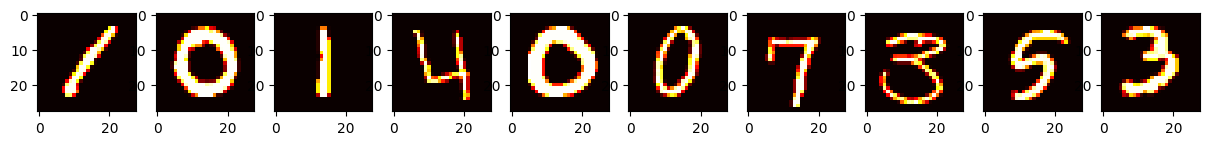

In [7]:
#Plot the first row of training data 
y = data.label
x = data.loc[:,'pixel0':].values
m,n = x.shape
print(m,n)

plt.subplots(1, 10, figsize =(15,15))
for i in range(10):
    digit = x[i,:].reshape(28,28)
    ax = plt.subplot(1, 10, i +1)
    ax.imshow(digit, cmap = 'hot')


In [8]:
#Add bias to x
m, n = x.shape
X = np.concatenate([np.ones((m,1)), x], axis = 1)
m, n = X.shape

y = np.array(y)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.10, random_state=0)
print(yTest.shape, yTrain.shape)

# Initialize the W matrix (one row per class)
k = 10 #Number of classes
m,n = xTrain.shape 

w = np.zeros((k, n))
print(w.shape)

# Define number of iterations or epochs
epochs = 20


#Multiclass Perceptron
for j in range(epochs):
    
    #Initialize variables
    correct = 0 
    yt = [] 
    
    #Multiclass perceptron algorithm
    for i in range(m):
        z = np.dot(xTrain[i, :], w.T)
        y_hat = np.argmax(z)
        yt.append(y_hat)
        if y_hat != yTrain[i]:
            w[yTrain[i], :] = w[yTrain[i], :] + xTrain[i, :]
            w[y_hat, :] = w[y_hat, :] - xTrain[i, :]
        else:
            correct += 1

         
print('correct', correct, 'from', m)
print('W', w)

(4200,) (37800,)
(10, 785)
correct 33758 from 37800
W [[ -421.     0.     0. ...     0.     0.     0.]
 [  228.     0.     0. ...     0.     0.     0.]
 [  411.     0.     0. ...     0.     0.     0.]
 ...
 [  641.     0.     0. ...     0.     0.     0.]
 [-2128.     0.     0. ...     0.     0.     0.]
 [ -505.     0.     0. ...     0.     0.     0.]]


In [9]:
#Performance measurement for Training
yt =np.array(yt)
print('y', y.shape)
print('yt', yt.shape)
print('Correct', correct, 'misclassified', m - correct)
print("Accuracy: ", correct / len(y))

y (42000,)
yt (37800,)
Correct 33758 misclassified 4042
Accuracy:  0.8037619047619048


### Confusion Matrix 

For evaluating the classification for each class we will use the confusion matrix measurement.


In [10]:
#Obtainig the metrics for the confusion matrix
cm = confusion_matrix(yTrain, yt)
print(cm)

[[3575    0   20    7    7   32   27    8   27    7]
 [   1 4047   32   23    3   10    6   15   63   11]
 [  24   29 3328  102   39   31   41   38  116   20]
 [  12   12  113 3400    4  166   14   30  126   48]
 [   8   16   18   12 3281    9   40   22   48  189]
 [  40   11   42  158   40 2778   59   17  228   40]
 [  28    9   43    5   26   69 3514    1   25    5]
 [  10   12   46   38   22    8    3 3560   20  213]
 [  23   52   89  151   27  162   25   18 3061   71]
 [  11   10   12   52  186   44    0  194   71 3214]]


In [11]:
#Function for plotting the confusion matrix

def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(10, 10))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

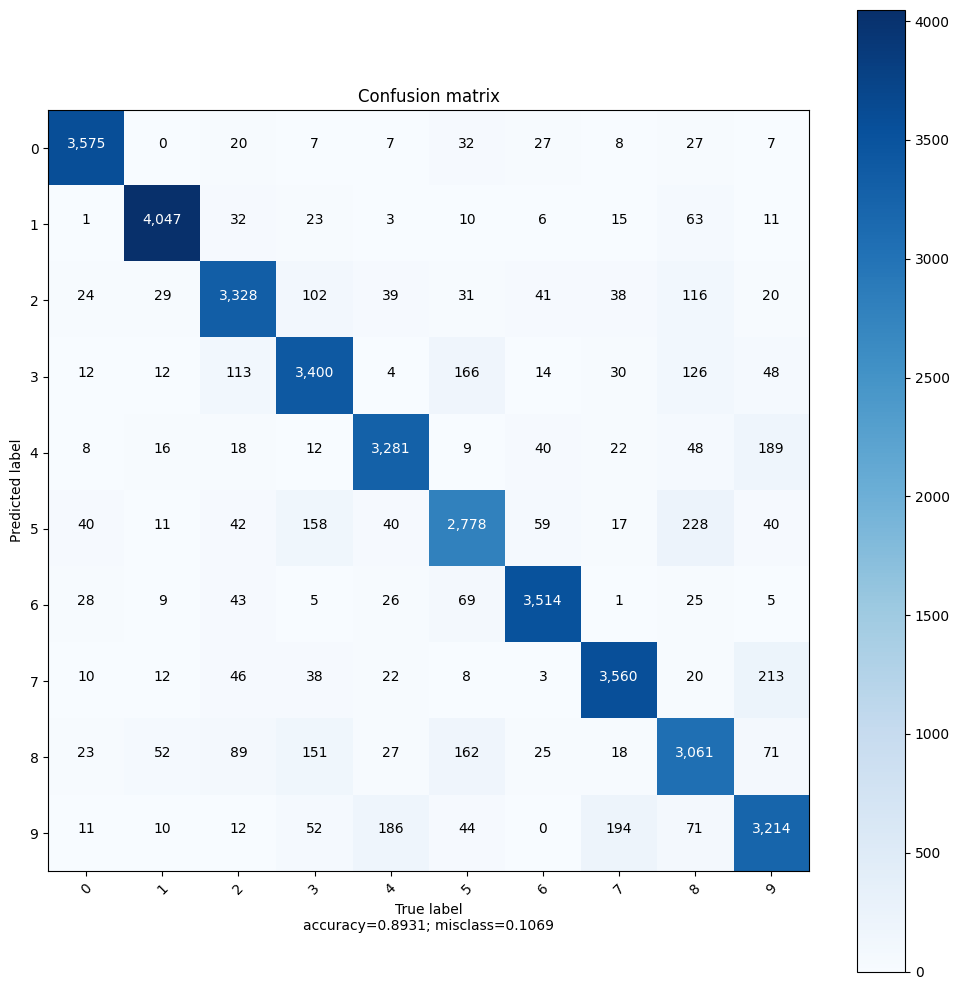

In [12]:
#Plotting confusion matrix for k = 10

mat = confusion_matrix(yTrain, yt)
plot_confusion_matrix(values = mat, classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
